## Problem Statement

*a) Identify the factors causing chronic kidney disease.*

*b) Build a model that can help to determine if a patient is suffering from kidney chronic disease or not.*


## Summary

1) It is a classification problem

2) Features include numerical values and categorical values

3) Categorical features need to convert to numerical (Hot encoding)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### Data Collection & Preliminary Analysis

*Reading the dataset given with the problem, and converting into dataframe.*

In [2]:
df = pd.read_csv('kidneyChronic.csv')

In [3]:
# columns
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [4]:
# Getting Familier with the dataset
df.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,60,90,1.015,3,0,?,?,notpresent,notpresent,74,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68,70,1.01,0,0,?,normal,notpresent,notpresent,100,...,36,?,?,no,no,no,good,no,no,ckd
7,24,?,1.015,2,4,normal,abnormal,notpresent,notpresent,410,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,52,100,1.015,3,0,normal,abnormal,present,notpresent,138,...,33,9600,4,yes,yes,no,good,no,yes,ckd
9,53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


*Label column is "class" , lets analyse it contents*

In [5]:
df["class"].value_counts()

ckd       250
notckd    150
Name: class, dtype: int64

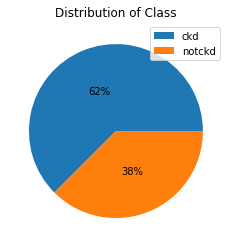

In [6]:
# Visualise the distribution of the classes
df.groupby('class').count()
ckd = 250
notckd = 150

chart_labels = ['ckd', 'notckd']
data = [ckd, notckd]

plt.pie(data,autopct='%1.0f%%',pctdistance=0.5, labeldistance=1.1 )
plt.title('Distribution of Class')
plt.legend(chart_labels, loc='best')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age      400 non-null object
bp       400 non-null object
sg       400 non-null object
al       400 non-null object
su       400 non-null object
rbc      400 non-null object
pc       400 non-null object
pcc      400 non-null object
ba       400 non-null object
bgr      400 non-null object
bu       400 non-null object
sc       400 non-null object
sod      400 non-null object
pot      400 non-null object
hemo     400 non-null object
pcv      400 non-null object
wbcc     400 non-null object
rbcc     400 non-null object
htn      400 non-null object
dm       400 non-null object
cad      400 non-null object
appet    400 non-null object
pe       400 non-null object
ane      400 non-null object
class    400 non-null object
dtypes: object(25)
memory usage: 78.2+ KB


*Clearly visible that we don't have missing values in Dataset*

In [8]:
df.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

*? seems to be odd man out here and as we can see it has quite huge presence in some of the columns.*

In [9]:
df["rbc"].value_counts()

normal      201
?           152
abnormal     47
Name: rbc, dtype: int64

*lets have a look at the presence of ? in all the columns*

In [10]:
df.apply(pd.Series.value_counts).loc["?"]

age        9.0
bp        12.0
sg        47.0
al        46.0
su        49.0
rbc      152.0
pc        65.0
pcc        4.0
ba         4.0
bgr       44.0
bu        19.0
sc        17.0
sod       87.0
pot       88.0
hemo      52.0
pcv       70.0
wbcc     105.0
rbcc     130.0
htn        2.0
dm         2.0
cad        2.0
appet      1.0
pe         1.0
ane        1.0
class      NaN
Name: ?, dtype: float64

*Lets see how the data looks like , what kind of data we have*

In [11]:
temp_df = df.describe(include=['object'])

In [12]:
# So we can see we have quite a few categorical data to deal with
temp_df.loc["unique"] <= 3

age      False
bp       False
sg       False
al       False
su       False
rbc       True
pc        True
pcc       True
ba        True
bgr      False
bu       False
sc       False
sod      False
pot      False
hemo     False
pcv      False
wbcc     False
rbcc     False
htn       True
dm       False
cad      False
appet     True
pe        True
ane       True
class     True
Name: unique, dtype: bool

## Data Preprocessing & Data Cleansing

*Since we have many columns as categorical and some of them as numerical, so one of the basic technique to use categorical data for Classification is via "Hot Encoding" where we replace the categories by binary values shown below.*

In [13]:
# Encoding and Cleansing
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':0,'normal':1})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['class'] = df['class'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
df['pe'] = df['pe'].replace(to_replace='good',value=1)
df['appet'] = df['appet'].replace(to_replace='no',value=0)
df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
df['wbcc']=df['wbcc'].replace('\t8400',8400)
df['wbcc']=df['wbcc'].replace('\t6200',6200)
df['pcv']=df['pcv'].replace('\t43',43)


df = df.replace("?", np.nan)
df = df.replace("\t?", np.nan)

## Handling missing values

*lets have a look at the different methods to try and fill missing values and later on we will see which one adds to the accuracy of our model*

### 1) Filling missing values by median (numerical) and high frequency values (nominal)

In [14]:
data_to_fill = pd.DataFrame(df)
fill = pd.Series([data_to_fill[c].value_counts().index[0] if data_to_fill[c].dtype == np.dtype('O') else data_to_fill[c].median() for c in data_to_fill],
        index=data_to_fill.columns)
filled_data_median=data_to_fill.fillna(fill)

In [15]:
filled_data_median = filled_data_median.dropna(axis=0)
filled_data_median['class'].value_counts()

1.0    250
0.0    150
Name: class, dtype: int64

## Feature Selection or Feature Engineering

*So we are done with Data Preprocessing or Cleansing , now lets focus on what all features actually contirbuting to the Chronic Disease. For this we can use various techniques one of the famous one is via correlation among entities.*

*Correlation
In this part we are going to check if there are any correlating columns and visualize it. 
Correlating columns are the ones which: 
○ Provide the same information, but are in different formats
○ Are not very useful, because they do not provide that much information
○ Could potentially confuse an algorithm that we are using*

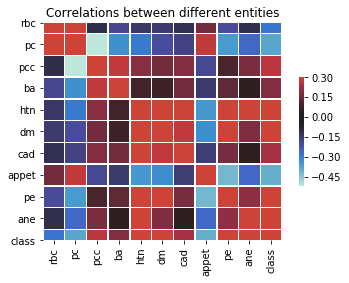

In [16]:
corr_df = filled_data_median.corr()
sns.heatmap(corr_df, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlations between different entities')
plt.show()

*We can refine our heatmap by removing redundant information*

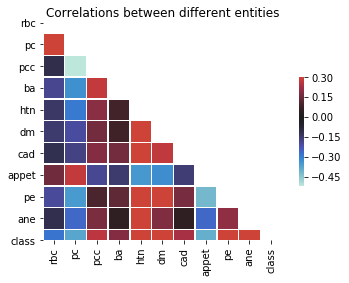

In [17]:
# Mask the redundant area
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap
sns.heatmap(corr_df, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlations between different entities')
plt.show()

## Train with Different Classifiers

*since this is classification problem lets try to model the data with the most common and basic classifiers*

In [18]:
X = filled_data_median.drop("class", axis=1)
y = filled_data_median["class"]

# Visual Comparison
cols=["Classifier", "Accuracy"]
data = pd.DataFrame(columns=cols)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### K nearest Neighbours

In [19]:
from sklearn.neighbors import KNeighborsClassifier

cls = KNeighborsClassifier(5)
cls.fit(X_train, y_train)

# prediction

train_predictions = cls.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print("Accuracy Score: ", acc)
row = pd.DataFrame([[cls.__class__.__name__, acc*100]], columns=cols)
data = data.append(row)

# confusion matrix
cm = confusion_matrix(y_test, train_predictions)
print("Confusion Matrix: ", cm)

Accuracy Score:  0.725
Confusion Matrix:  [[26  2]
 [20 32]]


### Support Vector Machine

In [20]:
from sklearn.svm import SVC
cls = SVC(C=.1, degree=1, kernel='poly', probability=True)
cls.fit(X_train, y_train)

# prediction

train_predictions = cls.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print("Accuracy Score: ", acc)

row = pd.DataFrame([[cls.__class__.__name__, acc*100]], columns=cols)
data = data.append(row)

# confusion matrix
cm = confusion_matrix(y_test, train_predictions)
print("Confusion Matrix: ", cm)

/Users/abhinavkumar/PycharmProjects/py37/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy Score:  0.925
Confusion Matrix:  [[26  2]
 [ 4 48]]


### Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
cls = DecisionTreeClassifier()

cls.fit(X_train, y_train)

# prediction

train_predictions = cls.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print("Accuracy Score: ", acc)
row = pd.DataFrame([[cls.__class__.__name__, acc*100]], columns=cols)
data = data.append(row)

# confusion matrix
cm = confusion_matrix(y_test, train_predictions)
print("Confusion Matrix: ", cm)

Accuracy Score:  1.0
Confusion Matrix:  [[28  0]
 [ 0 52]]


### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()

cls.fit(X_train, y_train)

# prediction

train_predictions = cls.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print("Accuracy Score: ", acc)
row = pd.DataFrame([[cls.__class__.__name__, acc*100]], columns=cols)
data = data.append(row)

# confusion matrix
cm = confusion_matrix(y_test, train_predictions)
print("Confusion Matrix: ", cm)

Accuracy Score:  0.975
Confusion Matrix:  [[27  1]
 [ 1 51]]


/Users/abhinavkumar/PycharmProjects/py37/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


###  RandomForestClassifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier()

cls.fit(X_train, y_train)

# prediction

train_predictions = cls.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print("Accuracy Score: ", acc)
row = pd.DataFrame([[cls.__class__.__name__, acc*100]], columns=cols)
data = data.append(row)

# confusion matrix
cm = confusion_matrix(y_test, train_predictions)
print("Confusion Matrix: ", cm)

Accuracy Score:  0.9875
Confusion Matrix:  [[28  0]
 [ 1 51]]


/Users/abhinavkumar/PycharmProjects/py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Gaussian Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
cls = GaussianNB()
cls.fit(X_train, y_train)
train_predictions = cls.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print("Accuracy Score: ", acc)
row = pd.DataFrame([[cls.__class__.__name__, acc*100]], columns=cols)
data = data.append(row)

# confusion matrix
cm = confusion_matrix(y_test, train_predictions)
print("Confusion Matrix: ", cm)

Accuracy Score:  0.9875
Confusion Matrix:  [[28  0]
 [ 1 51]]


## Conclusion

We have tried to predict if an individual has Chronic Kidney Disease based on data gathered. This dataset had 400 instances with different labels including a class which indicated if the individual had CDK. We have performed a lot of data cleaning activities including replacing missing values with values based on an algorithm chosen by us. We trained and tested our model and we have gotten very good prediction rates.

In conclusion we got the desired result and therefore totally fulfilled our goal. It could also be added that our work group was very happy about the results, since we have managed to achieve such high accuracies. We have also learned various techniques in both preparing the data and using it for training various models.

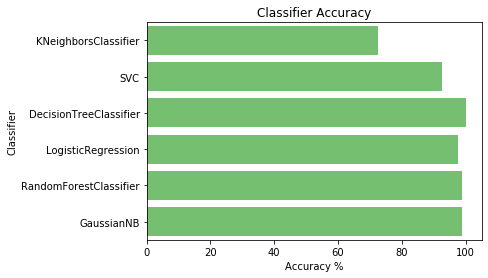

In [25]:
#Comparing all the model that has been evaluated till this point and measuring their accuracy
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=data, color="g")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()